# Экзаменационная работа 
# группа PMP 172
# Рахимжанов А.К.


<h2>Настоящая работа основана на данных с ресурса https://www.kaggle.com/vitaliymalcev/russian-passenger-air-service-20072020</h2>

<h3>1. В работе изучаются массивы данных о пассажиро- и грузо- потоках в России за период 2007-2020 гг. </h3>

<h3>2. Гипотеза №1: пассажирские и грузовые потоки коррелируют друг с другом во времени</h3>

<h3>3. Гипотеза №2: Пассажирские потоки можно свести к линейной регрессии</h3>

In [2]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import sklearn

In [3]:
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
cargo_file_path = os.path.join(raw_data_path, 'CARGO_AND_PARCELS.csv')
passenger_file_path = os.path.join(raw_data_path, 'russian_passenger.csv')

In [5]:
cargo_df = pd.read_csv(cargo_file_path)
passenger_df = pd.read_csv(passenger_file_path)

pd.options.display.max_rows = 1000

In [6]:
type(cargo_df)

pandas.core.frame.DataFrame

In [11]:
cargo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airport name         3961 non-null   object 
 1   Year                 3961 non-null   int64  
 2   January              3961 non-null   float64
 3   February             3961 non-null   float64
 4   March                3961 non-null   float64
 5   April                3961 non-null   float64
 6   May                  3961 non-null   float64
 7   June                 3961 non-null   float64
 8   July                 3961 non-null   float64
 9   August               3961 non-null   float64
 10  September            3961 non-null   float64
 11  October              3961 non-null   float64
 12  November             3961 non-null   float64
 13  December             3961 non-null   float64
 14  Whole year           3961 non-null   float64
 15  Airport coordinates  3961 non-null   o

In [12]:
passenger_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airport name         3961 non-null   object 
 1   Year                 3961 non-null   int64  
 2   January              3961 non-null   float64
 3   February             3961 non-null   float64
 4   March                3961 non-null   float64
 5   April                3961 non-null   float64
 6   May                  3961 non-null   float64
 7   June                 3961 non-null   float64
 8   July                 3961 non-null   float64
 9   August               3961 non-null   float64
 10  September            3961 non-null   float64
 11  October              3961 non-null   float64
 12  November             3961 non-null   float64
 13  December             3961 non-null   float64
 14  Whole year           3961 non-null   float64
 15  Airport coordinates  3961 non-null   o

In [13]:
cargo_df.head()

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
0,Abakan,2020,43.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2020,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2020,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2020,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2020,122.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('177.738273'), Decimal('64.713433'))"


In [155]:
passenger_df.tail()

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
3956,Yakutsk,2007,27636.0,25976.0,34291.0,38803.0,38478.0,59142.0,67295.0,75257.0,52681.0,44505.0,40439.0,1916.60,545577.0,"(Decimal('129.750225'), Decimal('62.086594'))"
3957,Yakutsk (Magan),2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('-6.226888'), Decimal('8.607871'))"
3958,Yamburg,2007,6239.0,3195.0,6648.0,6268.0,6088.0,6028.0,5975.0,6024.0,6262.0,6451.0,6968.0,8.87,72626.0,"(Decimal('75.097783'), Decimal('67.980026'))"
3959,Yaroslavl (Tunoshna),2007,557.0,720.0,650.0,411.0,328.0,864.0,688.0,965.0,883.0,505.0,640.0,2055.60,8277.0,"(Decimal('40.170054'), Decimal('57.56231'))"
3960,Yartsevo,2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('90.203907'), Decimal('60.252931'))"


In [8]:
passenger_df.head()

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
0,Abakan,2020,13495.0,14940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2020,4255.0,4565.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('177.738273'), Decimal('64.713433'))"


In [14]:
passenger_df.loc[100:150]

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
100,Moscow (Vnukovo),2020,1650445.0,1465291.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('37.295014'), Decimal('55.608562'))"
101,Moscow (Domodedovo),2020,2099024.0,1860818.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('37.767995'), Decimal('55.437168'))"
102,Moscow (Ostafyevo),2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not found
103,Moscow (Sheremetyevo),2020,3366567.0,3098337.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('37.405974'), Decimal('55.962962'))"
104,Мотыгино,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('94.738926'), Decimal('58.181907'))"
105,Murmansk,2020,98066.0,84717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('32.758163'), Decimal('68.784743'))"
106,Cape-Stone,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not found
107,Nadym,2020,16076.0,14927.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('72.69258'), Decimal('65.479934'))"
108,Nazran (Magas),2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('44.81624'), Decimal('43.171501'))"
109,Nalchik,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('43.635863'), Decimal('43.508409'))"


In [15]:
passenger_df[passenger_df['Airport name'] == 'Moscow (Domodedovo)'][:5]
#надо свести все Moscow в одну строку

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
101,Moscow (Domodedovo),2020,2099024.0,1860818.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('37.767995'), Decimal('55.437168'))"
351,Moscow (Domodedovo),2019,1853642.0,1600017.0,1991136.0,2118931.0,2501917.0,2682233.0,3044152.0,3159854.0,2798581.0,2468083.0,2033543.0,10468.84,28252337.0,"(Decimal('37.767995'), Decimal('55.437168'))"
599,Moscow (Domodedovo),2018,2070002.0,1773283.0,2065279.0,2201021.0,2536179.0,3006178.0,3277260.0,3304305.0,2973728.0,2440995.0,1905057.0,11629.81,29403704.0,"(Decimal('37.767995'), Decimal('55.437168'))"
874,Moscow (Domodedovo),2017,2089356.0,1817757.0,2078000.0,2270115.0,2620156.0,2994124.0,3512406.0,3521769.0,3138883.0,2530505.0,2037611.0,11631.97,30657854.0,"(Decimal('37.767995'), Decimal('55.437168'))"
1166,Moscow (Domodedovo),2016,2046469.0,1758246.0,1926879.0,1895649.0,2200560.0,2764977.0,3320256.0,3360288.0,2929008.0,2370762.0,1939898.0,12593.67,28500259.0,"(Decimal('37.767995'), Decimal('55.437168'))"


In [17]:
unique_airport = passenger_df['Airport name'].unique()
#type(unique_airport)

In [18]:
len(unique_airport)

298

<h2>группир. по Назв. аэропорта + Год  + Сумма за год</h2>

In [21]:
#группировка годовых значений по городам с соотнесением по медиане
passenger_year_group = passenger_df.groupby(['Airport name'])['Year', 'Whole year'].median()

C:\Users\Askar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [22]:
passenger_year_group

,Year,Whole year
Airport name,,
Abakan,2013.5,137258.5
Achinsk,2012.0,0.0
Aikhal,2013.5,0.0
Amderma,2013.5,0.0
Anadyr,2012.5,86123.0
Anadyr (Carbon),2019.5,51064.5
Anapa (Vitjazevo),2013.5,678939.5
Antypayuta,2012.0,0.0
Apatite (Khibiny),2013.5,0.0


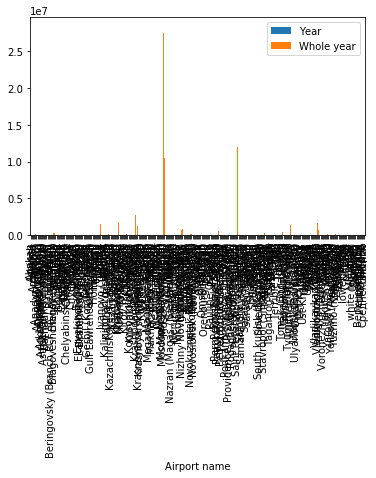

In [23]:
passenger_year_group.plot(kind='bar');
#загруженность аэрортов
#два пика соотв. городам Москва и С-Петербург
# при этом для Москвы - это группа пиков от 0 до 2.8 млн. ед.

<h3>Объединение аэропортов Москвы</h3>

In [24]:
#созд. отд. датафрейм
passenger_group_df = pd.read_csv(passenger_file_path)

In [25]:
def getName(name):
#     print(name.find('Moscow'))
    return np.where(name.find('Moscow'), name, 'Moscow')
    
# добавл. нов. столбца
passenger_group_df['Airport']= passenger_group_df['Airport name'].map(lambda x: getName(x))
                                                                #.map(lambda x:x[x.find('Moscow'): x.find('Moscow')+6])    

In [131]:
##использ. т/о при неправ. добавл. нов. столбца 
#passenger_df.drop(['Airport'], axis=1, inplace=True)

In [26]:
#добавился нов. столбец <Airport>
passenger_group_df[passenger_group_df['Airport name'] == 'Moscow (Domodedovo)'][:5]

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates,Airport
101,Moscow (Domodedovo),2020,2099024.0,1860818.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('37.767995'), Decimal('55.437168'))",Moscow
351,Moscow (Domodedovo),2019,1853642.0,1600017.0,1991136.0,2118931.0,2501917.0,2682233.0,3044152.0,3159854.0,2798581.0,2468083.0,2033543.0,10468.84,28252337.0,"(Decimal('37.767995'), Decimal('55.437168'))",Moscow
599,Moscow (Domodedovo),2018,2070002.0,1773283.0,2065279.0,2201021.0,2536179.0,3006178.0,3277260.0,3304305.0,2973728.0,2440995.0,1905057.0,11629.81,29403704.0,"(Decimal('37.767995'), Decimal('55.437168'))",Moscow
874,Moscow (Domodedovo),2017,2089356.0,1817757.0,2078000.0,2270115.0,2620156.0,2994124.0,3512406.0,3521769.0,3138883.0,2530505.0,2037611.0,11631.97,30657854.0,"(Decimal('37.767995'), Decimal('55.437168'))",Moscow
1166,Moscow (Domodedovo),2016,2046469.0,1758246.0,1926879.0,1895649.0,2200560.0,2764977.0,3320256.0,3360288.0,2929008.0,2370762.0,1939898.0,12593.67,28500259.0,"(Decimal('37.767995'), Decimal('55.437168'))",Moscow


In [27]:
passenger_group_df['Whole_year'] = passenger_group_df['Whole year'] 
passenger_group_df[['Airport name', 'Year', 'Whole year', 'Airport']][100:110]
##теперь сложить строки по Москве

,Airport name,Year,Whole year,Airport
100,Moscow (Vnukovo),2020,0.0,Moscow
101,Moscow (Domodedovo),2020,0.0,Moscow
102,Moscow (Ostafyevo),2020,0.0,Moscow
103,Moscow (Sheremetyevo),2020,0.0,Moscow
104,Мотыгино,2020,0.0,Мотыгино
105,Murmansk,2020,0.0,Murmansk
106,Cape-Stone,2020,0.0,Cape-Stone
107,Nadym,2020,0.0,Nadym
108,Nazran (Magas),2020,0.0,Nazran (Magas)
109,Nalchik,2020,0.0,Nalchik


In [28]:
passenger_group_df[passenger_group_df['Airport'] == 'Moscow'][['Year', 'Whole year', 'Airport']][:10]

,Year,Whole year,Airport
100,2020,0.0,Moscow
101,2020,0.0,Moscow
102,2020,0.0,Moscow
103,2020,0.0,Moscow
350,2019,24001521.0,Moscow
351,2019,28252337.0,Moscow
352,2019,0.0,Moscow
353,2019,49438545.0,Moscow
598,2018,21478486.0,Moscow
599,2018,29403704.0,Moscow


In [29]:
pass_after_group = passenger_group_df.groupby(['Airport'])['Year', 'Whole year'].mean()

C:\Users\Askar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [440]:
len(passenger_df['Airport name'].unique()) #298
# len(pass_after_group) #294
# len(passenger_group_df.Airport.unique()) #294

298

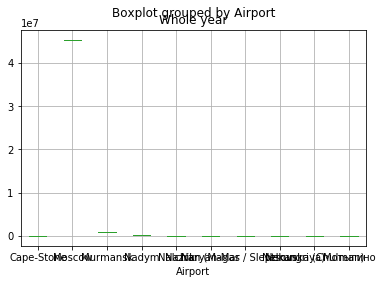

In [385]:
passenger_group_df[passenger_group_df['Year'] == 2018][100:110].boxplot('Whole year', 'Airport');
# выбран диапазон включ. Москву

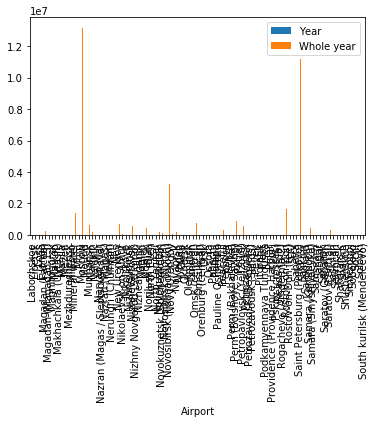

In [247]:
pass_after_group[100:200].plot(kind='bar');
#максимумы у Москвы и С.Петербурга
# для Москвы знач. средней в 13 млн. ед. формировалось в т.ч. нулевыми знач. 

In [58]:
# passenger_group_df.groupby(['Airport', 'Year']).Whole_year.sum().unstack()
final_pass_group = passenger_group_df.groupby(['Airport', 'Year']).Whole_year.sum().unstack()

In [59]:
final_pass_group.iloc[110:120]

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Airport,,,,,,,,,,,,,,
Mezen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mezhdurechensk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Milkovo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mineral water,760485.0,827764.0,701914.0,888106.0,966301.0,1279461.0,1472836.0,1921453.0,1957121.0,1721697.0,2180178.0,2409488.0,2526419.0,0.0
Mom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Moscow,39482927.0,43432881.0,41016973.0,50838803.0,56250089.0,63824922.0,70915035.0,77032311.0,77599152.0,76102552.0,88438162.0,96230340.0,101692403.0,0.0
Mound,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murmansk,361472.0,403729.0,348031.0,466641.0,549895.0,570543.0,614024.0,667065.0,751258.0,763668.0,846440.0,938022.0,1029661.0,0.0
Nadym,199038.0,186715.0,138883.0,139921.0,150001.0,175569.0,162446.0,173769.0,167200.0,163339.0,169313.0,186769.0,212451.0,0.0


<Figure size 1008x432 with 0 Axes>

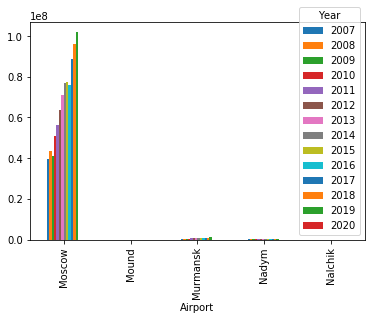

In [480]:
# динамика в заданном диапазоне городов
plt.figure(figsize=(14,6));
final_pass_group.iloc[115:120].plot(kind='bar');

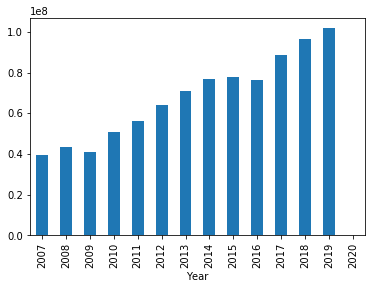

In [32]:
#динамика по Москве
final_pass_group.loc['Moscow'].plot(kind='bar');

# Статистика

In [441]:
final_pass_group.describe(include='all')

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.410000e+02,2.440000e+02,243.0
mean,2.615744e+05,2.884659e+05,2.652121e+05,3.279851e+05,3.697574e+05,4.182246e+05,4.703264e+05,5.125898e+05,5.084123e+05,5.069768e+05,5.850858e+05,7.642692e+05,8.156905e+05,0.0
std,2.381092e+06,2.622697e+06,2.475387e+06,3.068685e+06,3.401044e+06,3.860844e+06,4.295729e+06,4.669711e+06,4.694074e+06,4.609654e+06,5.364170e+06,6.342795e+06,6.667968e+06,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.227500e+04,6.572500e+04,0.0
max,3.948293e+07,4.343288e+07,4.101697e+07,5.083880e+07,5.625009e+07,6.382492e+07,7.091504e+07,7.703231e+07,7.759915e+07,7.610255e+07,8.843816e+07,9.623034e+07,1.016924e+08,0.0


In [397]:
passenger_group_df.describe(include='all')

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates,Airport
count,3961,3961.000000,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3961.000000,3.961000e+03,3961,3961
unique,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267,294
top,Usinsk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not found,Moscow
freq,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184,67
mean,NaN,2013.324161,3.031445e+04,2.755062e+04,2.820968e+04,3.001708e+04,3.476017e+04,4.175026e+04,4.771815e+04,4.888993e+04,4.241617e+04,3.570571e+04,3.021245e+04,234.541005,4.204410e+05,NaN,NaN
std,NaN,3.969638,1.867992e+05,1.682710e+05,1.807836e+05,1.920722e+05,2.176587e+05,2.539412e+05,2.872099e+05,2.925108e+05,2.582981e+05,2.239536e+05,1.887233e+05,1547.251287,2.603713e+06,NaN,NaN
min,NaN,2007.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN
25%,NaN,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN
50%,NaN,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN
75%,NaN,2017.000000,1.410000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN


In [396]:
passenger_group_df.Airport.value_counts(normalize=True)
#!!!по популярности С.-Петербург только на 3м месте, вместе с Сургутом и Казанью и после Усинска с 
# Воркутой, что не говорит об объемах

Moscow                                       0.016915
Usinsk                                       0.007069
Vorkuta                                      0.007069
Nyagan                                       0.007069
Ust-Tsilma                                   0.007069
Amderma                                      0.003534
Ulyanovsk (Barataevka)                       0.003534
Noyabrsk                                     0.003534
Vologda                                      0.003534
Okha                                         0.003534
remedy                                       0.003534
Strezhevoy                                   0.003534
Pauline Osipenko                             0.003534
Kazan (Begiševo)                             0.003534
Saskılah                                     0.003534
Tigil                                        0.003534
Surgut                                       0.003534
Manila                                       0.003534
Turukhansk                  

In [395]:
passenger_group_df[passenger_group_df['Airport'] == 'Moscow'].describe(include='all')

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates,Airport
count,67,67.000000,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,67.000000,6.700000e+01,67,67
unique,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1
top,Moscow (Sheremetyevo),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not found,Moscow
freq,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,67
mean,NaN,2013.253731,9.722541e+05,8.723938e+05,9.079392e+05,9.694509e+05,1.101855e+06,1.280133e+06,1.447979e+06,1.481750e+06,1.314224e+06,1.136346e+06,9.531984e+05,7621.696269,1.317696e+07,NaN,NaN
std,NaN,3.970891,9.744495e+05,8.810599e+05,9.780532e+05,1.031972e+06,1.145571e+06,1.320088e+06,1.495119e+06,1.519498e+06,1.346149e+06,1.188920e+06,1.009101e+06,8904.021936,1.376657e+07,NaN,NaN
min,NaN,2007.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN
25%,NaN,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN
50%,NaN,2013.000000,8.682720e+05,7.225430e+05,6.610000e+05,7.249510e+05,8.171510e+05,9.799340e+05,1.102368e+06,1.135496e+06,1.001941e+06,8.470180e+05,7.228690e+05,3869.240000,9.699450e+06,NaN,NaN
75%,NaN,2016.500000,1.788680e+06,1.593140e+06,1.591638e+06,1.831940e+06,2.120600e+06,2.410994e+06,2.701916e+06,2.738630e+06,2.560154e+06,2.196548e+06,1.791770e+06,14325.460000,2.485157e+07,NaN,NaN


In [33]:
#значений NULL нет
passenger_df.isna().sum()

Airport name           0
Year                   0
January                0
February               0
March                  0
April                  0
May                    0
June                   0
July                   0
August                 0
September              0
October                0
November               0
December               0
Whole year             0
Airport coordinates    0
dtype: int64

In [9]:
cargo_df.isna().sum()

Airport name           0
Year                   0
January                0
February               0
March                  0
April                  0
May                    0
June                   0
July                   0
August                 0
September              0
October                0
November               0
December               0
Whole year             0
Airport coordinates    0
dtype: int64

In [69]:
passenger_df['Year'].value_counts()

2017    292
2015    292
2013    292
2011    292
2009    292
2007    292
2016    292
2014    292
2012    292
2010    292
2008    292
2019    251
2020    250
2018    248
Name: Year, dtype: int64

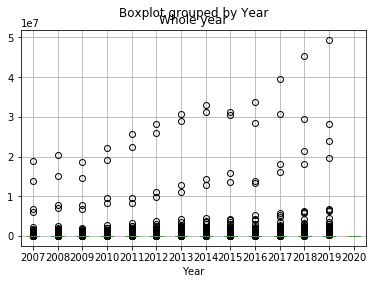

In [484]:
#как видно основная масса пассажиропотока равномерно увеличивается во времени, 
#наблюдаемые отклонения - это всплески пассажиропотоков по отдельным направлениям, 
#количесвто которых также увеличивается во времени (кроме 2020 года)
passenger_df[passenger_df['Whole year'].notnull()].boxplot('Whole year', 'Year');

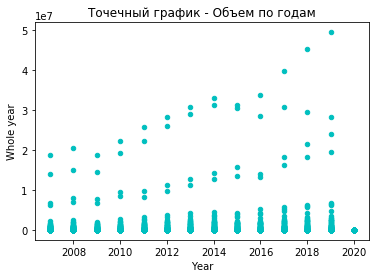

In [70]:
# аналогично
passenger_df.plot.scatter(x='Year', y='Whole year', color='c', title='Точечный график - Объем по годам');

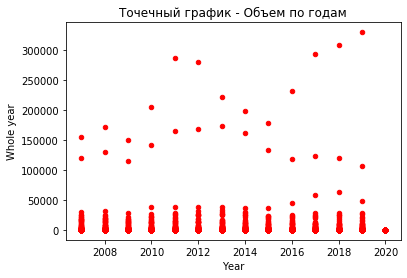

In [134]:
cargo_df.plot.scatter(x='Year', y='Whole year', color='r', title='Точечный график - Объем по годам');
#из данного графика виден неустойчивый рост (из-за всплесков) грузопотоков во времени (кроме 2020 года),
#в основной же массе объем грузопотоков практически не изменяется

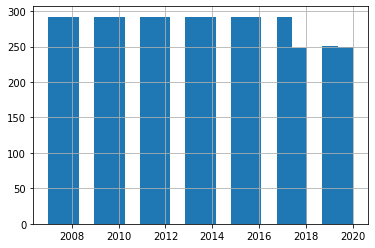

In [133]:
#в основной массе объем грузопотоков практически не изменяется
cargo_df['Year'].hist(bins=20);

In [120]:
cargo_df['Year'].value_counts()

2017    292
2015    292
2013    292
2011    292
2009    292
2007    292
2016    292
2014    292
2012    292
2010    292
2008    292
2019    251
2020    250
2018    248
Name: Year, dtype: int64

# Pivot tabs. Поворот таблиц ['Whole year'-'Year']

<h3>Согласно повороту таблиц пассажиропоток и грузоперевозки до 2020 года демонстрируют практически синхронный подъем</h3>

In [134]:
cargo_pivoted = cargo_df.pivot_table(index = 'Year', values='Whole year')
cargo_pivoted = cargo_pivoted.rename(columns = {'Whole year': 'Whole_year_cargo'})
cargo_pivoted.tail()

,Whole_year_cargo
Year,
2016,2326.610103
2017,2649.528356
2018,3093.126129
2019,3046.240120
2020,0.000000


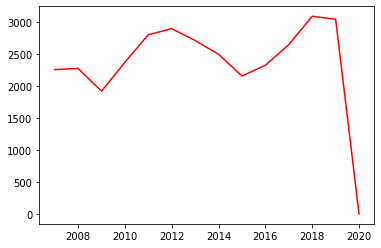

In [81]:
plt.plot(cargo_pivoted, color = 'red');

In [135]:
pass_pivoted = passenger_df.pivot_table(index = 'Year', values='Whole year')
# переименовать столбцы
pass_pivoted = pass_pivoted.rename(columns = {'Whole year': 'Whole_year_pass'})
pass_pivoted.tail()

,Whole_year_pass
Year,
2016,493087.041096
2017,569056.071918
2018,742697.088710
2019,792942.147410
2020,0.000000


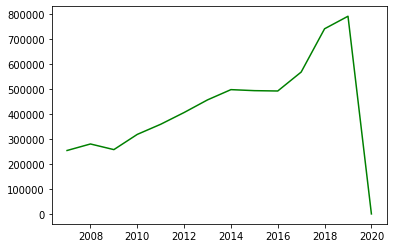

In [78]:
plt.plot(pass_pivoted, color = 'green');
#pass_pivoted.plot(kind='bar'); #аналог

# Корреляция пассажиро- и грузо-потоков

In [137]:
pivoted_df = pd.concat((pass_pivoted, cargo_pivoted), axis=1)

In [138]:
pivoted_df

,Whole_year_pass,Whole_year_cargo
Year,,
2007,254407.993151,2258.350103
2008,280562.743151,2276.309795
2009,257946.027397,1920.581404
2010,318999.160959,2373.404041
2011,359627.027397,2803.738733
2012,406766.390411,2898.589144
2013,457440.763699,2713.483151
2014,498546.256849,2498.140822
2015,494483.167808,2158.249897


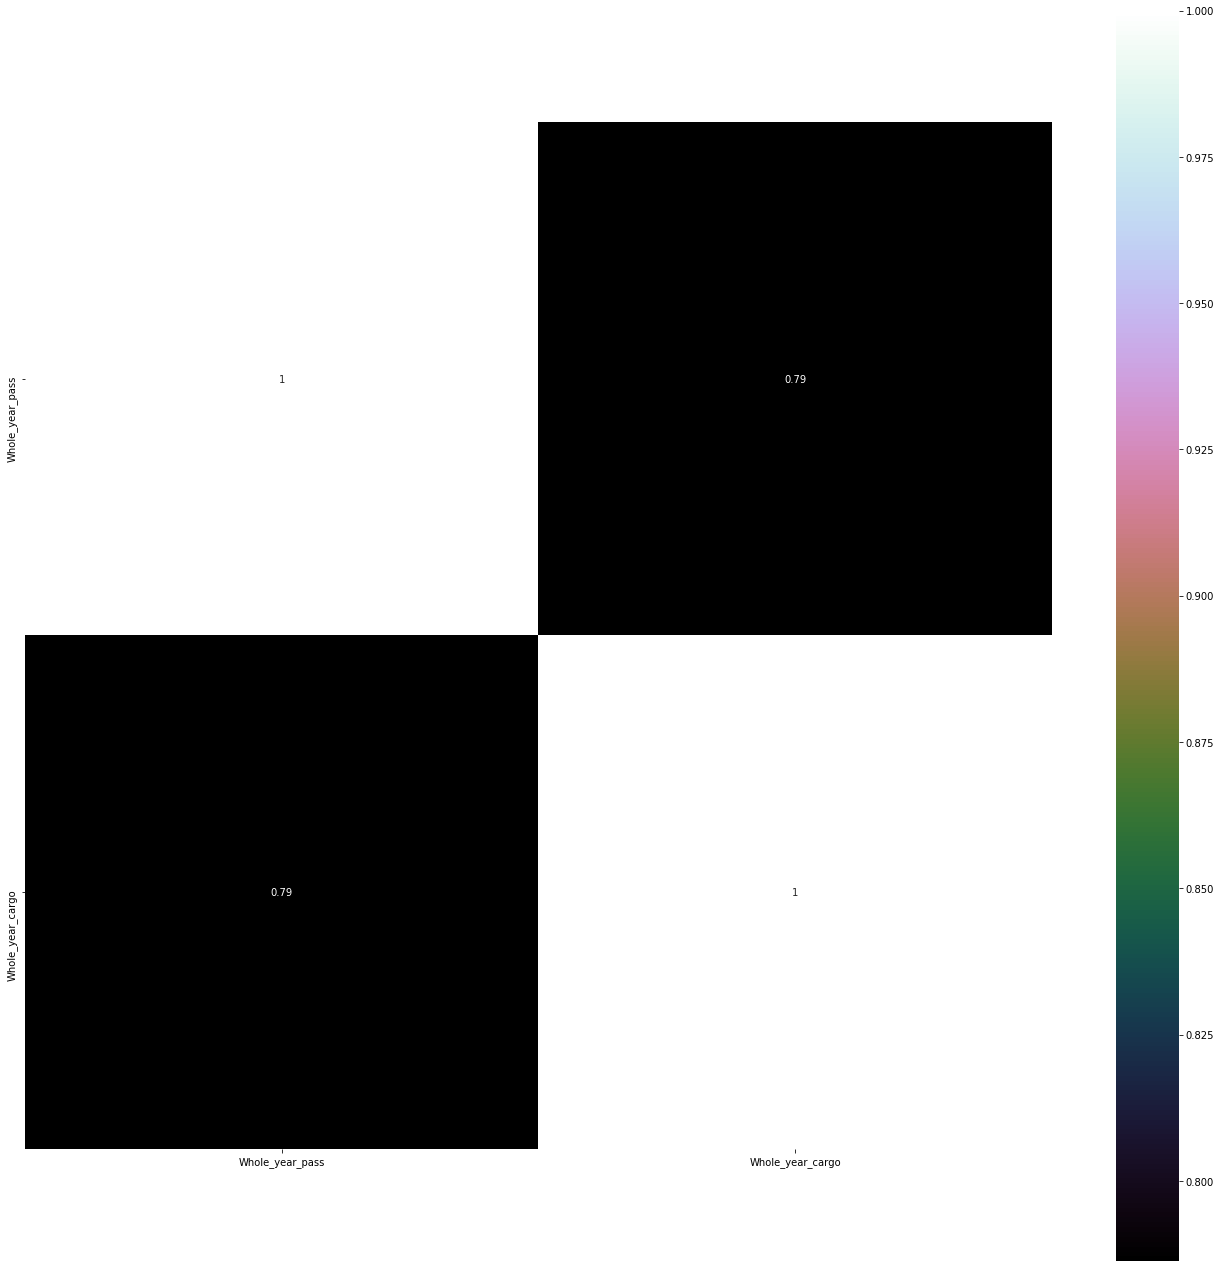

In [139]:
import seaborn as sns
correlation = pivoted_df.corr()
plt.figure(figsize=(23,23))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix');

<h3>Вывод: коэфициент корреляции 0,79, что указывает на сильную корреляцию данных</h3>

# Crosstabs 

In [282]:
#менее информативно чем группировка или поворот (0 - не соответствует, 1 - соответствует, 
# значения в Whole year от 0 до максимума и можно задать диапазон)
pd.crosstab(passenger_df['Whole year'], passenger_df.Year).loc[950000:1000000]

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Whole year,,,,,,,,,,,,,,
955857.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
958530.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
961122.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
961491.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
966301.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
967829.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
969139.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
973705.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
985211.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [283]:
#аналогично, только по январю
pd.crosstab(passenger_df['Airport name'], passenger_df.January)

January,0.0,4.0,5.0,19.0,20.0,21.0,22.0,23.0,36.0,38.0,...,2089356.0,2093318.0,2099024.0,2122021.0,2167390.0,2255793.0,2686564.0,3025847.0,3366567.0,3553862.0
Airport name,,,,,,,,,,,,,,,,,,,,,
Abakan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Achinsk,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aikhal,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amderma,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anadyr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anadyr (Carbon),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anapa (Vitjazevo),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Antypayuta,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apatite (Khibiny),14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Pivot tabs. Поворот таблиц по месяцам

In [315]:
pivot_pass_month = passenger_df.pivot_table(index = 'Year', values = ['January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August', 'September', 'October', 'November', 'December'], aggfunc = sum)

In [316]:
pivot_pass_month = pivot_pass_month.reindex(columns = ['January', 'February', 'March', 'April', 'May',    #reindex the columns
       'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [673]:
pivot_pass_month.tail() 

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,9186708.0,8547411.0,9638081.0,9912538.0,11361583.0,13940169.0,16197919.0,16545897.0,14728223.0,12427516.0,10624634.0,74462.63
2017,10768775.0,9927701.0,11156744.0,12013343.0,13779831.0,16262067.0,18848804.0,18791372.0,16715321.0,14139973.0,12012965.0,76151.11
2018,12062442.0,10803965.0,12469167.0,13404012.0,15136489.0,18223574.0,20506743.0,20827070.0,18666936.0,15975987.0,13525855.0,74609.50
2019,13178003.0,11879666.0,14116326.0,14827949.0,16867711.0,19237571.0,21794725.0,22141266.0,19515959.0,17153176.0,14182851.0,77269.41
2020,14228350.0,12900562.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


         January    February       March       April         May        June  \
Year                                                                           
2019  13178003.0  11879666.0  14116326.0  14827949.0  16867711.0  19237571.0   

            July      August   September     October    November  December  
Year                                                                        
2019  21794725.0  22141266.0  19515959.0  17153176.0  14182851.0  77269.41  


<Figure size 1008x432 with 0 Axes>

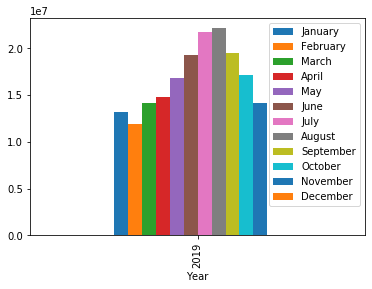

In [310]:
 #график по данным за 2019 год
df = pivot_pass_month.iloc[[12]]
plt.figure(figsize=(14,6));
df.plot(kind='bar');
print(df);


<Figure size 1008x432 with 0 Axes>

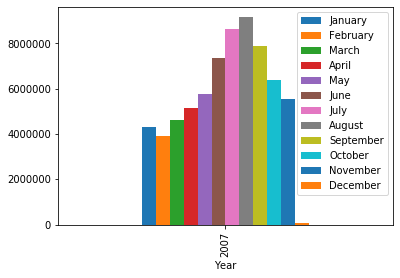

In [461]:
#график по данным за 2007 год
df = pivot_pass_month.iloc[[0]] 
plt.figure(figsize=(14,6));
df.plot(kind='bar');

In [113]:
#Сравнение графиков показывает, что объемы пассажироперевозок в 2020г. по сравнению с 2007 г. увеличились примерно в 3 раза,
#при этом помесячная динамика аналогична (объясняется сезонностью)

# MACHINE LEARNING
# Прогноз пассажиропотоков на 2019-20 годы

# 1. Подготовка

In [60]:
final_pass_group[100:120]

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Airport,,,,,,,,,,,,,,
Labozhskoe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lipetsk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Loss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Luengo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Magadan (Falcon),190181.0,197517.0,199100.0,244112.0,277601.0,318959.0,368330.0,348907.0,326629.0,347340.0,376794.0,0.0,425652.0,0.0
Magadan (Magadan-13),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
Magnitogorsk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Maikop,52.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
Makhachkala (Uytash),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1295353.0,1500690.0,0.0


In [61]:
final_pass_group.loc['Total'] = final_pass_group.sum(axis = 0)  

In [62]:
final_pass_group.tail()

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Airport,,,,,,,,,,,,,,
Мотыгино,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Нюрба,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Среднеколымск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Таксимо,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,74287134.0,81924321.0,75320240.0,93147755.0,105011092.0,118775786.0,133572703.0,145575507.0,144389085.0,143981416.0,166164373.0,184188878.0,199028479.0,0.0


In [63]:
final_pass_group = final_pass_group.drop_duplicates(subset=[2007], keep=False)
final_pass_group = final_pass_group.fillna(0) #заполнить пропуски 0

In [64]:
final_pass_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, Abakan to Total
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2007    66 non-null     float64
 1   2008    66 non-null     float64
 2   2009    66 non-null     float64
 3   2010    66 non-null     float64
 4   2011    66 non-null     float64
 5   2012    66 non-null     float64
 6   2013    66 non-null     float64
 7   2014    66 non-null     float64
 8   2015    66 non-null     float64
 9   2016    66 non-null     float64
 10  2017    66 non-null     float64
 11  2018    66 non-null     float64
 12  2019    66 non-null     float64
 13  2020    66 non-null     float64
dtypes: float64(14)
memory usage: 7.7+ KB


In [85]:
## В X положить все столбцы до 2019 г.
x = final_pass_group.loc[:, :'2018']
x

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Airport,,,,,,,,,,,,
Abakan,80631.0,82172.0,69454.0,89431.0,93425.0,120531.0,153986.0,197992.0,192155.0,181196.0,185185.0,197222.0
Anadyr,89011.0,83235.0,74429.0,81495.0,82531.0,82012.0,93295.0,128993.0,82331.0,90040.0,95538.0,102806.0
Anapa (Vitjazevo),618971.0,574978.0,510574.0,576997.0,520614.0,586831.0,738908.0,1005383.0,1178984.0,1418070.0,1362793.0,1487382.0
Arkhangelsk (Talagy),385836.0,475172.0,465747.0,640889.0,738185.0,703759.0,759474.0,797610.0,799536.0,729714.0,891867.0,942972.0
Astrakhan (Narimanovo),182092.0,204643.0,216424.0,327592.0,345689.0,328103.0,387228.0,426648.0,546146.0,524261.0,580910.0,597038.0
Blagoveshchensk,147145.0,145473.0,113401.0,152408.0,179290.0,234258.0,308713.0,314233.0,356894.0,319045.0,398705.0,412835.0
Bugulma,21046.0,23120.0,16928.0,34734.0,51600.0,58445.0,70340.0,58809.0,24937.0,51586.0,54009.0,43182.0
Chelyabinsk (Balandino),663483.0,677865.0,573587.0,658251.0,820275.0,991252.0,1197747.0,1394142.0,1229435.0,1188865.0,1469769.0,1640535.0
Ekaterinburg (Koltsovo),2251621.0,2437919.0,2092602.0,2697208.0,3289052.0,3730888.0,4253202.0,4473239.0,4170737.0,4207328.0,5277434.0,5953782.0


In [80]:
# seria = final_pass_group.loc['Total']
# seria

In [79]:
# x = np.array(seria)
# x

In [78]:
final_pass_group.loc[:, '2019':'2019'][:10]

Year,2019
Airport,
Abakan,209772.0
Anadyr,0.0
Anapa (Vitjazevo),1641376.0
Arkhangelsk (Talagy),922539.0
Astrakhan (Narimanovo),672456.0
Blagoveshchensk,0.0
Bugulma,45681.0
Chelyabinsk (Balandino),1713532.0
Ekaterinburg (Koltsovo),6232318.0


In [76]:
y0 = final_pass_group.loc[:, '2019':'2019'].reset_index()

y = y0[2019].ravel()

In [86]:
print(x.shape)
print(type(y))
y.shape  #y  #теперь 1мерн массив - 65 городов + total

(66, 12)
<class 'numpy.ndarray'>


(66,)

In [795]:
#!pip install scikit-learn

In [73]:
from sklearn.model_selection import train_test_split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [84]:
x_test.tail()

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Airport,,,,,,,,,,,,
Novosibirsk (Tolmachyovo),1753948.0,1941483.0,1684310.0,2131445.0,2624344.0,3116210.0,3592285.0,3829667.0,3600291.0,3932368.0,4809605.0,5721367.0
Stavropol (Shpakovskoye),112380.0,89792.0,77703.0,112121.0,177058.0,220859.0,247709.0,343213.0,322365.0,328152.0,356210.0,392246.0
Total,74287134.0,81924321.0,75320240.0,93147755.0,105011092.0,118775786.0,133572703.0,145575507.0,144389085.0,143981416.0,166164373.0,184188878.0
Anapa (Vitjazevo),618971.0,574978.0,510574.0,576997.0,520614.0,586831.0,738908.0,1005383.0,1178984.0,1418070.0,1362793.0,1487382.0
Kazan,616390.0,763846.0,675721.0,958530.0,1226762.0,1486837.0,1847258.0,1942408.0,1794735.0,1912961.0,0.0,0.0


In [87]:
print(x.shape) # 65 городов, 12 лет (до 2018 включит.)
print(x_train.shape) # 48, 12 - на этом обучается
x_test.shape # 17, 12 - с этим сверяется

(66, 12)
(49, 12)


(17, 12)

In [88]:
print("Среднее кол. пассажиров в тренир. данных: {0: .2f}".format(np.mean(y_train)))

Среднее кол. пассажиров в тренир. данных:  3117540.39


In [89]:
print("Среднее кол. пассажиров в тестовых данных: {0: .2f}".format(np.mean(y_test)))

Среднее кол. пассажиров в тестовых данных:  13749721.59


# Base model

In [596]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [593]:
dummy_model = DummyClassifier(strategy="most_frequent", random_state=0)

In [594]:
dummy_model.fit(x_train, y_train)

DummyClassifier(random_state=0, strategy='most_frequent')

In [765]:
print(dummy_model.score(x_test, y_test)) #accurasy
# как видно модель не подходит

0.11764705882352941


In [766]:
print(confusion_matrix(y_test, dummy_model.predict(x_test)))

[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [767]:
print("Precision for baseline {0: 2f}".format(precision_score(y_test, dummy_model.predict(x_test), average='micro')))

Precision for baseline  0.117647


In [768]:
print(recall_score(y_test, dummy_model.predict(x_test), average='micro'))

0.11764705882352941


# LinearRegression Model

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
model_lr_1 = LinearRegression()

In [93]:
model_lr_1.fit(x_train, y_train)

LinearRegression()

In [94]:
print('Accuracy: ', model_lr_1.score(x_test, y_test))

Accuracy:  0.999515052869415


In [783]:
print('intercept:', model_lr_1.intercept_)

intercept: 26826.206117806723


In [786]:
#тангенсы угла наклона регресси в точках с 2007 по 2018 гг.
print('slope: ', model_lr_1.coef_)

slope:  [ 0.98237774 -2.6552516   4.43736284 -3.76829183  1.23883269  1.22750716
 -1.077349    0.62590696 -1.33249686  0.91520962  0.06622544  0.99568103]


In [779]:
# начальная точка пересечения с осью Y
model_lr_1.intercept_

26826.206117806723

In [789]:
y_pred = model_lr_1.predict(x_test)
print('predicted response:', y_pred, sep='\n')
# прогрнозы для 17 городов (тестовые)

predicted response:
[19582864.82039864   494754.80338602   451441.48544423  1317205.90550226
    54245.54901063  6456630.86060604   691241.35475708   978355.15365276
   274554.17370354   127261.84420237    26858.70299933  1696043.05968153
   -79688.18004028    39439.66021818  3357171.05590777   454083.42287883
  2319078.43226664]


ValueError: x and y must be the same size

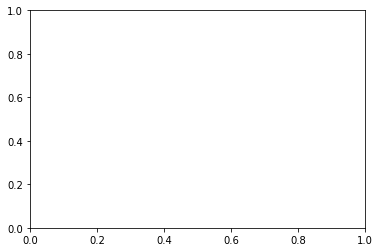

In [95]:
plt.scatter(x, y, color ='b') # точки
plt.plot(x, model_lr_1.predict(x), color ='k')  #прямая
plt.show()
# как видно данные неправильно подготовлены

# 2. Создание нового датафрейма

In [96]:
# за основу возмем
passenger_df

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
0,Abakan,2020,13495.0,14940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2020,4255.0,4565.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('177.738273'), Decimal('64.713433'))"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,Yakutsk,2007,27636.0,25976.0,34291.0,38803.0,38478.0,59142.0,67295.0,75257.0,52681.0,44505.0,40439.0,1916.60,545577.0,"(Decimal('129.750225'), Decimal('62.086594'))"
3957,Yakutsk (Magan),2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('-6.226888'), Decimal('8.607871'))"
3958,Yamburg,2007,6239.0,3195.0,6648.0,6268.0,6088.0,6028.0,5975.0,6024.0,6262.0,6451.0,6968.0,8.87,72626.0,"(Decimal('75.097783'), Decimal('67.980026'))"
3959,Yaroslavl (Tunoshna),2007,557.0,720.0,650.0,411.0,328.0,864.0,688.0,965.0,883.0,505.0,640.0,2055.60,8277.0,"(Decimal('40.170054'), Decimal('57.56231'))"


In [97]:
# созд. промеж. датафрейм с исключ. 2020 годом (в дальнейш. может мешать из-за нулей)
temp_xy_df = passenger_df.loc[passenger_df['Year'] != 2020]
temp_xy_df

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
250,Abakan,2019,12571.0,11563.0,12427.0,13023.0,16641.0,22758.0,27883.0,27391.0,19478.0,16155.0,14745.0,89.80,209772.0,"(Decimal('91.399735'), Decimal('53.751351'))"
251,Aikhal,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('111.543324'), Decimal('65.957161'))"
252,Loss,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('125.398355'), Decimal('58.602489'))"
253,Amderma,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('61.577429'), Decimal('69.759076'))"
254,Anadyr (Carbon),2019,3785.0,3916.0,5061.0,7169.0,8601.0,10464.0,13569.0,13429.0,11190.0,8370.0,7144.0,199.00,102129.0,"(Decimal('177.738273'), Decimal('64.713433'))"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,Yakutsk,2007,27636.0,25976.0,34291.0,38803.0,38478.0,59142.0,67295.0,75257.0,52681.0,44505.0,40439.0,1916.60,545577.0,"(Decimal('129.750225'), Decimal('62.086594'))"
3957,Yakutsk (Magan),2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('-6.226888'), Decimal('8.607871'))"
3958,Yamburg,2007,6239.0,3195.0,6648.0,6268.0,6088.0,6028.0,5975.0,6024.0,6262.0,6451.0,6968.0,8.87,72626.0,"(Decimal('75.097783'), Decimal('67.980026'))"
3959,Yaroslavl (Tunoshna),2007,557.0,720.0,650.0,411.0,328.0,864.0,688.0,965.0,883.0,505.0,640.0,2055.60,8277.0,"(Decimal('40.170054'), Decimal('57.56231'))"


In [987]:
#X = np.array(passenger_df['Year']).reshape(-1, 1) #повторы!!!
# len(X) #3981!!!!!

In [98]:
# удалить повторы годов кроме 1го вхожд.
temp_x_df = temp_xy_df.drop_duplicates(subset=['Year'], keep='first')
temp_x_df
#для вход. списка X будут нужны только годы (можно было  и вручную создать: np.array([2007, ..]))

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
250,Abakan,2019,12571.0,11563.0,12427.0,13023.0,16641.0,22758.0,27883.0,27391.0,19478.0,16155.0,14745.0,89.80,209772.0,"(Decimal('91.399735'), Decimal('53.751351'))"
501,Abakan,2018,11851.0,10504.0,11591.0,12323.0,14314.0,19935.0,25213.0,25507.0,19295.0,15815.0,15645.0,98.93,197222.0,"(Decimal('91.399735'), Decimal('53.751351'))"
749,Abakan,2017,11004.0,9761.0,10530.0,11466.0,14786.0,17209.0,23901.0,23688.0,18991.0,15891.0,13588.0,88.84,185185.0,"(Decimal('91.399735'), Decimal('53.751351'))"
1041,Abakan,2016,10773.0,9328.0,10665.0,12014.0,14035.0,19881.0,22877.0,24326.0,17307.0,13986.0,12677.0,94.01,181196.0,"(Decimal('91.399735'), Decimal('53.751351'))"
1333,Abakan,2015,12008.0,10324.0,11273.0,12265.0,15559.0,20670.0,24157.0,24219.0,19813.0,16601.0,12528.0,78.30,192155.0,"(Decimal('91.399735'), Decimal('53.751351'))"
1625,Abakan,2014,12596.0,12149.0,13969.0,13415.0,14694.0,20706.0,23056.0,24461.0,18644.0,15667.0,14907.0,83.38,197992.0,"(Decimal('91.399735'), Decimal('53.751351'))"
1917,Abakan,2013,9179.0,8747.0,9488.0,9783.0,9977.0,15524.0,16938.0,18095.0,15277.0,12397.0,13977.0,83.34,153986.0,"(Decimal('91.399735'), Decimal('53.751351'))"
2209,Abakan,2012,6141.0,6790.0,7258.0,9291.0,10554.0,13048.0,13398.0,14015.0,10729.0,8707.0,9585.0,81.25,120531.0,"(Decimal('91.399735'), Decimal('53.751351'))"
2501,Abakan,2011,5030.0,4357.0,5839.0,5751.0,7112.0,10568.0,11913.0,12376.0,9357.0,7060.0,6459.0,124.56,93425.0,"(Decimal('91.399735'), Decimal('53.751351'))"
2793,Abakan,2010,3779.0,4645.0,5328.0,5000.0,6521.0,10541.0,11274.0,12622.0,9298.0,7988.0,6314.0,110.60,89431.0,"(Decimal('91.399735'), Decimal('53.751351'))"


In [100]:
X = np.array(temp_x_df['Year']).reshape(-1, 1)
X = np.flipud(X) # revers array
X

array([[2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]], dtype=int64)

In [101]:
#в серию для Y положить годовые суммы
group_year_whole = passenger_df.groupby(['Year'])['Whole year'].sum()
group_year_whole = group_year_whole.loc[:2019] #до 2020
group_year_whole

Year
2007     74287134.0
2008     81924321.0
2009     75320240.0
2010     93147755.0
2011    105011092.0
2012    118775786.0
2013    133572703.0
2014    145575507.0
2015    144389085.0
2016    143981416.0
2017    166164373.0
2018    184188878.0
2019    199028479.0
Name: Whole year, dtype: float64

In [102]:
y = np.array(group_year_whole).reshape(-1, 1)
y #пока это 2мерн. массив

array([[7.42871340e+07],
       [8.19243210e+07],
       [7.53202400e+07],
       [9.31477550e+07],
       [1.05011092e+08],
       [1.18775786e+08],
       [1.33572703e+08],
       [1.45575507e+08],
       [1.44389085e+08],
       [1.43981416e+08],
       [1.66164373e+08],
       [1.84188878e+08],
       [1.99028479e+08]])

In [103]:
y=y.ravel()
y

array([7.42871340e+07, 8.19243210e+07, 7.53202400e+07, 9.31477550e+07,
       1.05011092e+08, 1.18775786e+08, 1.33572703e+08, 1.45575507e+08,
       1.44389085e+08, 1.43981416e+08, 1.66164373e+08, 1.84188878e+08,
       1.99028479e+08])

In [104]:
print(X.shape)  
y.shape

(13, 1)


(13,)

In [106]:
# разделение на тестовые и тренир. данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [117]:
print("Среднее кол. пассажиров в тренир. данных: {0: .2f}".format(np.mean(y_train)))

Среднее кол. пассажиров в тренир. данных:  120921451.11


In [118]:
print("Среднее кол. пассажиров в тестовых данных: {0: .2f}".format(np.mean(y_test)))
#пассажиров больше т.к. в тестовый пул вошли послед. годы с макс. кол-вом

Среднее кол. пассажиров в тестовых данных:  144268427.25


# LinearRegression 2

In [110]:
from sklearn.metrics import mean_squared_error, r2_score
model_lr_2 = LinearRegression()

In [111]:
model_lr_2.fit(X_train, y_train)

LinearRegression()

In [112]:
y_pred = model_lr_2.predict(X_test)

In [113]:
y_test

array([9.31477550e+07, 1.84188878e+08, 1.33572703e+08, 1.66164373e+08])

In [114]:
y_pred

array([9.72130679e+07, 1.78498953e+08, 1.27695275e+08, 1.68338218e+08])

In [115]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.98


In [1045]:
print('Slope: ', model_lr_2.coef_)
#вес признака - кажд. шаг по Х увелич. У на 10.4 млн. 

Slope:  [10443413.63152174]


In [1046]:
print('Intercept: ', model_lr_2.intercept_)

Intercept:  -20893882287.452183


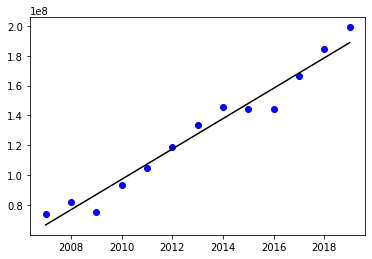

In [116]:

plt.scatter(X, y, color ='b') # точки
plt.plot(X, model_lr_2.predict(X), color ='k')  #прямая
plt.show()

# Как видно гипотеза о линейной регрессии объема пассажироперевозок во времени подтвердилась

<h3>Попытка предсказать объем пассажироперевозок на 2020 год</h3>

In [143]:
x2020 = X.copy()

In [154]:
np.append(x2020, 2020)

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020], dtype=int64)

In [158]:
# _x2020 = np.arange(2007, 2020).reshape(13, 1)
# print(_x2020.shape)